In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#lettura contenuto file csv
Poplanguages = pd.read_csv(r"C:\Users\chrin\Desktop\Visualizzazione\Dataset\Popularity of Programming Languages from 2004 to 2023.csv")
headers = Poplanguages.head()
print(headers)

             Date  Abap   Ada  C/C++    C#  Cobol  Dart  Delphi/Pascal   Go  \
0       July 2004  0.34  0.36  10.01  4.68   0.42   0.0           2.80  0.0   
1     August 2004  0.35  0.36   9.74  4.96   0.46   0.0           2.65  0.0   
2  September 2004  0.41  0.41   9.59  5.04   0.51   0.0           2.64  0.0   
3    October 2004  0.40  0.38   9.47  5.29   0.53   0.0           2.76  0.0   
4   November 2004  0.38  0.38   9.48  5.22   0.55   0.0           2.75  0.0   

   Groovy  ...  Powershell  Python     R  Ruby  Rust  Scala  Swift  \
0    0.03  ...        0.16    2.51  0.39  0.33  0.24   0.17    0.0   
1    0.07  ...        0.15    2.62  0.40  0.40  0.19   0.17    0.0   
2    0.08  ...        0.08    2.71  0.40  0.41  0.17   0.13    0.0   
3    0.09  ...        0.12    2.91  0.42  0.46  0.12   0.14    0.0   
4    0.07  ...        0.12    2.83  0.41  0.44  0.17   0.15    0.0   

   TypeScript   VBA  Visual Basic  
0         0.0  1.43          8.50  
1         0.0  1.45          8.5

In [2]:
#estrazione date
dates = []
for i in Poplanguages.index:
    date = Poplanguages['Date'][i]
    date_splitted = date.split()
    year = date_splitted[len(date_splitted)-1]
    dates.append(year)
unique_dates = np.unique(dates)
print(unique_dates)


['2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013'
 '2014' '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023']


In [3]:
#mappa mese-anni
dates_dictionary = {}
for i in Poplanguages.index:
    date = Poplanguages['Date'][i]
    date_splitted = date.split()
    month = date_splitted[0]
    year = date_splitted[1]
    if month in dates_dictionary:
        dates_dictionary[month].append(year)
    else:
        dates_dictionary[month] = [year]
    
print(dates_dictionary)

{'July': ['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], 'August': ['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], 'September': ['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], 'October': ['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], 'November': ['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], 'December': ['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], 'January'

In [4]:
#mappa linguaggi di programmazione + media valori per anno

languages_map = {}
years = []

for col in Poplanguages.columns:
    if col != 'Date':
        languages_map[col] = {}

for i in Poplanguages.index:
    date = Poplanguages['Date'][i]
    date_splitted = date.split()
    year = date_splitted[1]
    years.append(year)

    #mappa con linguaggio(chiave 1), anno(chiave 2), somma valori per linguaggio/anno
    """ for l in languages_map:
        if year in languages_map[l]:
            languages_map[l][year] += Poplanguages[l][i]
        else:
            languages_map[l][year] = Poplanguages[l][i] """

    #mappa con linguaggio(chiave 1), anno(chiave 2), array valori annuali
    for l in languages_map:
        if year in languages_map[l]:
            languages_map[l][year].append(Poplanguages[l][i]) 
        else:
            languages_map[l][year] = [Poplanguages[l][i]]

unique_years = np.unique(years)

print(unique_years)
print(languages_map)


['2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013'
 '2014' '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023']
{'Abap': {'2004': [0.3399999999999999, 0.35, 0.41, 0.4, 0.38, 0.36], '2005': [0.3899999999999999, 0.37, 0.3399999999999999, 0.3399999999999999, 0.35, 0.35, 0.33, 0.32, 0.36, 0.38, 0.38, 0.3899999999999999], '2006': [0.4, 0.41, 0.37, 0.35, 0.3399999999999999, 0.3399999999999999, 0.35, 0.35, 0.3399999999999999, 0.3399999999999999, 0.36, 0.4], '2007': [0.38, 0.4, 0.3899999999999999, 0.38, 0.38, 0.32, 0.3399999999999999, 0.36, 0.36, 0.36, 0.37, 0.41], '2008': [0.38, 0.36, 0.36, 0.35, 0.3399999999999999, 0.32, 0.36, 0.35, 0.3899999999999999, 0.42, 0.42, 0.43], '2009': [0.4, 0.38, 0.37, 0.35, 0.37, 0.37, 0.4, 0.43, 0.41, 0.43, 0.43, 0.44], '2010': [0.48, 0.49, 0.5499999999999999, 0.53, 0.58, 0.61, 0.58, 0.6, 0.61, 0.66, 0.63, 0.62], '2011': [0.62, 0.61, 0.59, 0.59, 0.65, 0.64, 0.66, 0.69, 0.7000000000000001, 0.72, 0.6799999999999999, 0.710000000000000

In [5]:
#media valori per anno
#descrizione dataset: Content --> This dataset contains data about the Most Popular Programming Languages from 2004 to 2023. All Programming Languages values are in percentage form out of 100 %
mean_languages_map = {}
year_elem_count = 0
for year in unique_years:
    for l in languages_map:
        if year in mean_languages_map:
            mean_languages_map[year] += np.sum(languages_map[l][year])
            year_elem_count += len(languages_map[l][year])
        else:
            mean_languages_map[year] = np.sum(languages_map[l][year])
            year_elem_count = len(languages_map[l][year])

        mean_languages_map[year] /= year_elem_count
        year_elem_count = 0
    
print(mean_languages_map)


{'2004': 8.60292628195127, '2005': 7.547400418131942, '2006': 6.442264669258974, '2007': 5.585805742239032, '2008': 5.362753553619729, '2009': 5.572860854851192, '2010': 5.479109304076371, '2011': 4.920015635440745, '2012': 4.049186796005752, '2013': 3.4260550960005567, '2014': 2.8247744277264926, '2015': 2.3359342860291297, '2016': 1.8634066277310195, '2017': 1.5225780496784298, '2018': 1.3343661137325078, '2019': 1.1521581256438422, '2020': 1.016608755470214, '2021': 0.885328363877328, '2022': 0.6957837981942571, '2023': 0.9181994426131197}


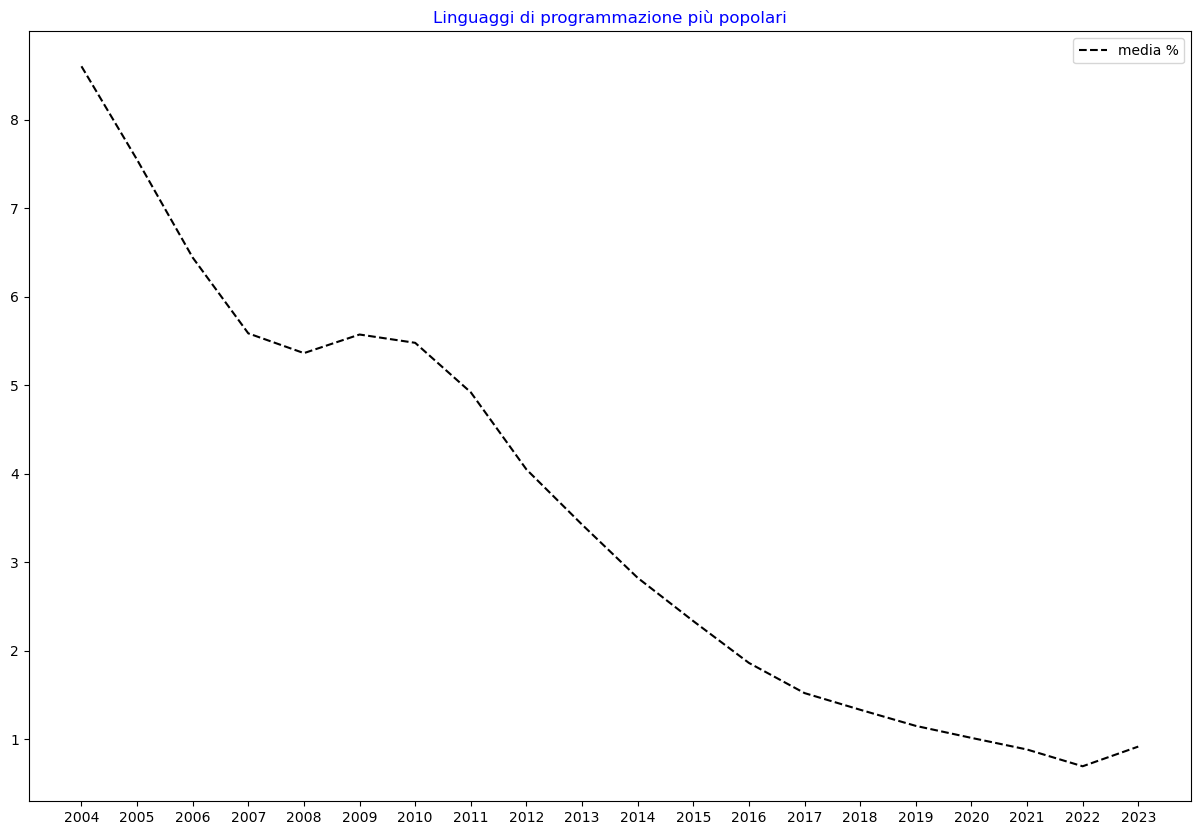

In [6]:
#estrazione anno - media da mean_languages_map
years_fromMap = []
means_fromMap = []

for year in mean_languages_map:
    years_fromMap.append(year)
    means_fromMap.append(mean_languages_map[year])

#years_forVisualization = ['2004','2007','2010','2013','2016','2019','2023']

#estrazione linguaggi - somma valori per anno da languages_map
""" languages_fromDset = []

for l in Poplanguages.columns:
    languages_fromDset.append(l) """

#languages_forVisualization = ['C/C++','C#','Go','Java','JavaScript','PHP','Python']

plt.figure(figsize=(15,10))
plt.plot(years_fromMap, means_fromMap, linestyle='--', color='black', label='Medie')
plt.title('Linguaggi di programmazione più popolari',color='b')
plt.legend(['media %'])

plt.show()



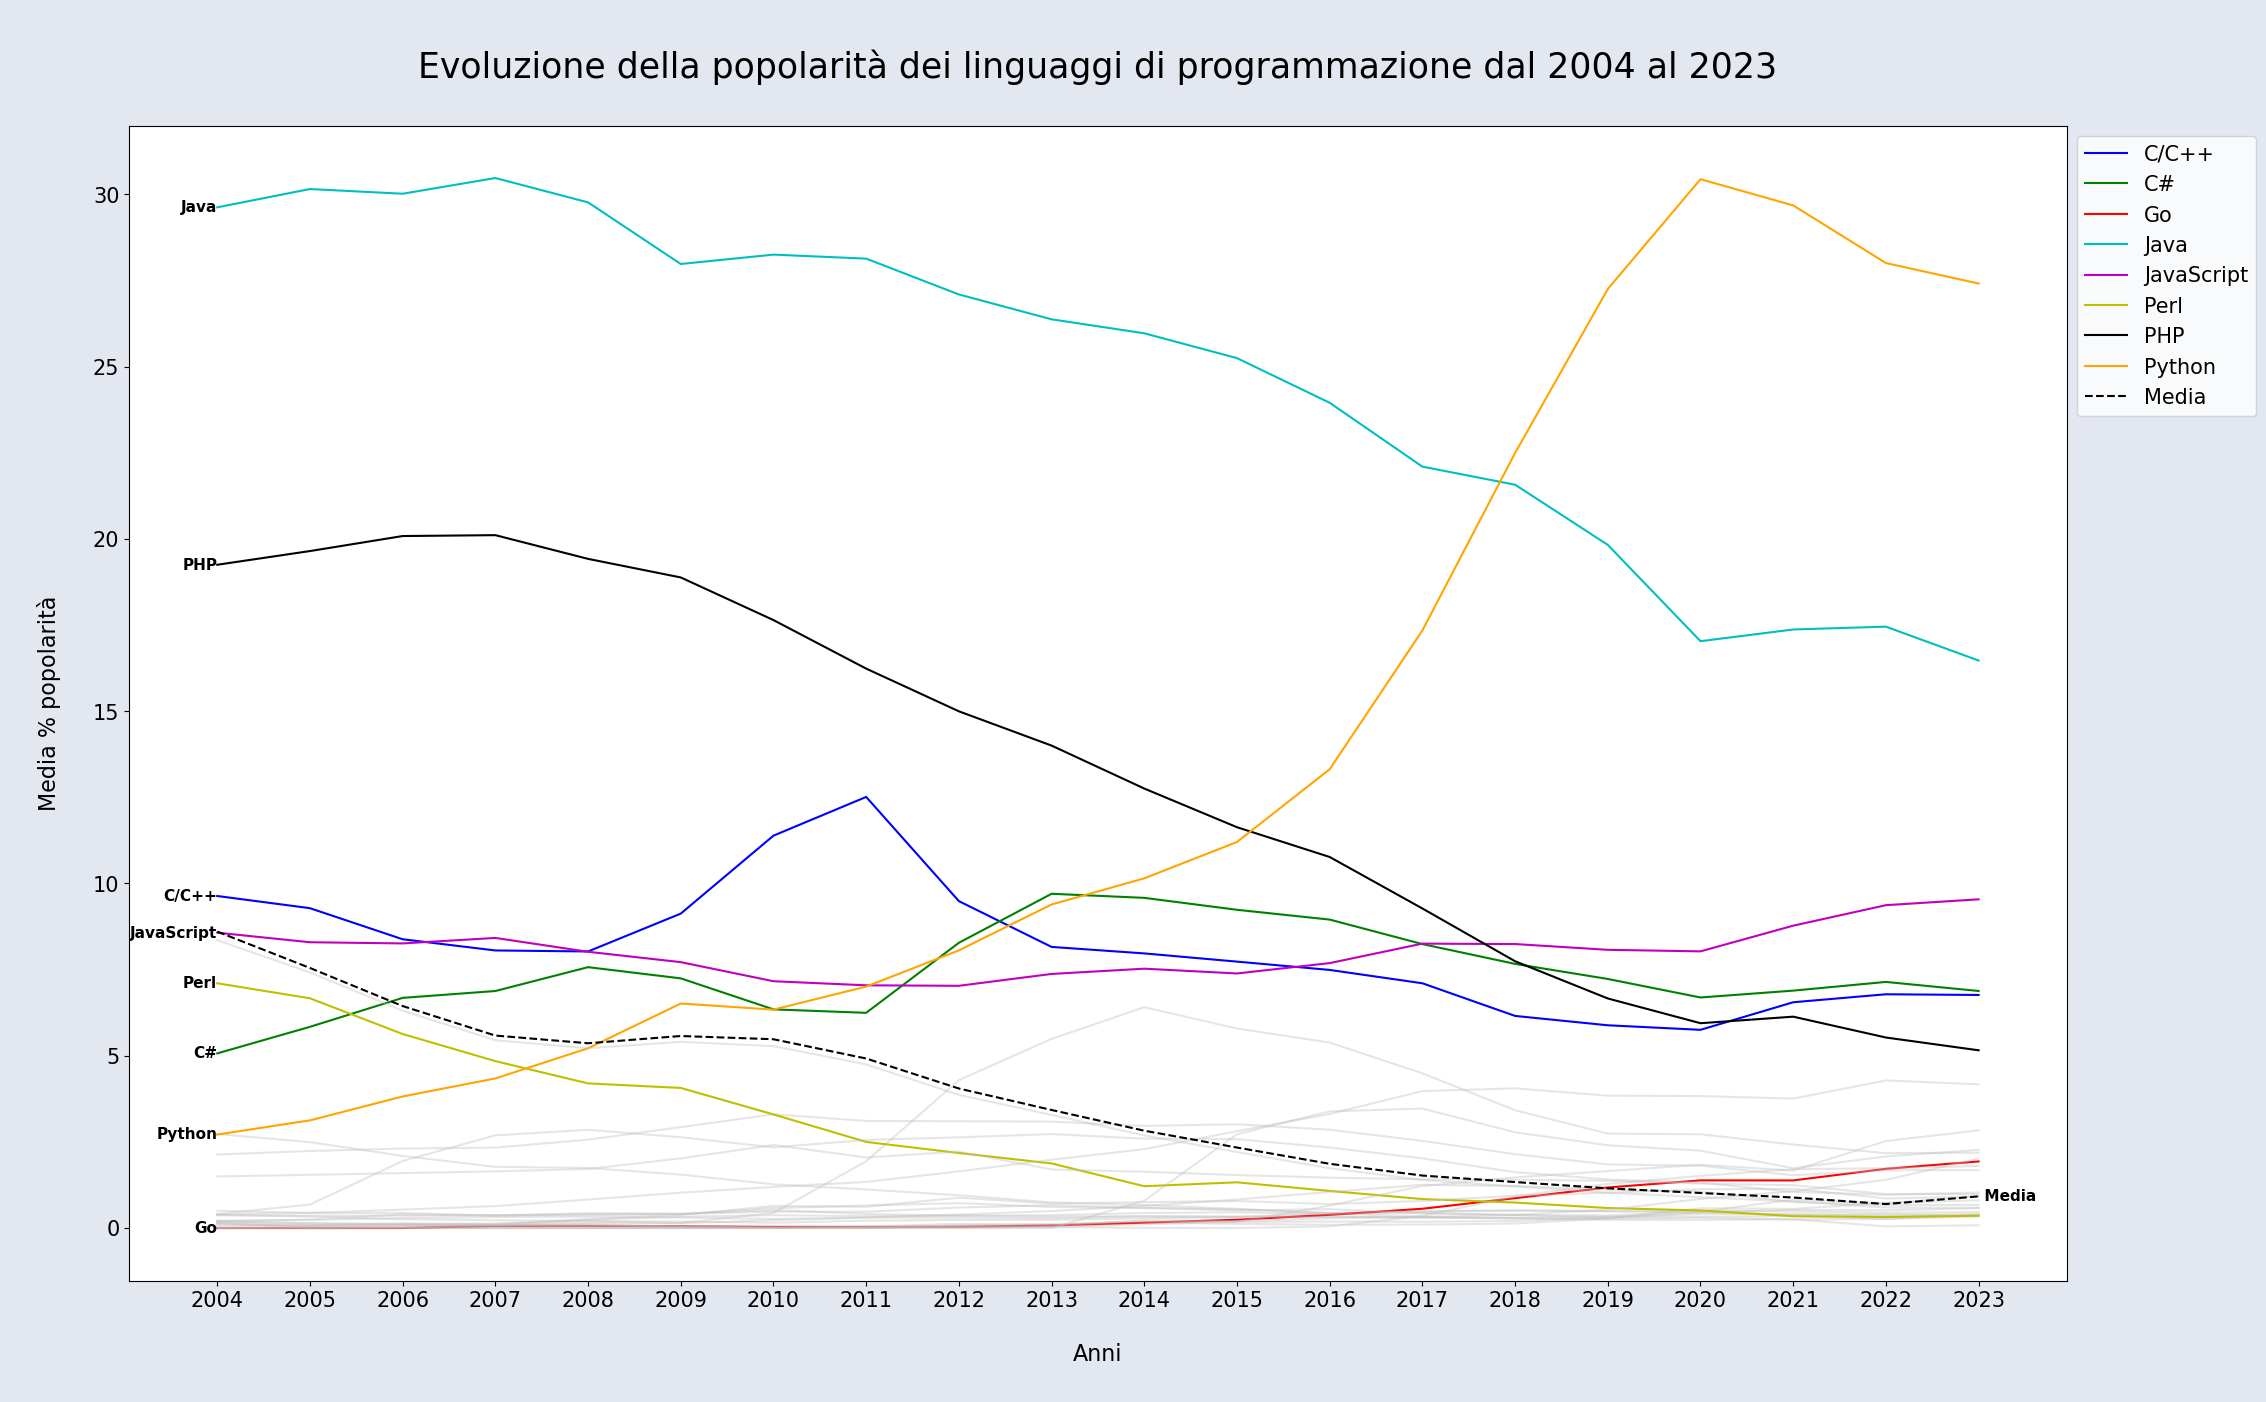

In [13]:
#estrazione anno - media da mean_languages_map
years_fromMap = []
means_fromMap = []

for year in mean_languages_map:
    years_fromMap.append(year)
    means_fromMap.append(mean_languages_map[year])

#plot istogrammi con media complessiva dataset, media per linguaggio ogni anno
languages_forVisualization = ['Perl','C/C++','C#','Go','Java','JavaScript','PHP','Python']
colors_array = ['b','g','r','c','m','y','k','orange']
fig = plt.figure(figsize=(25,15))
fig.set_facecolor('#e3e7f0')

current_language_values = []
array = []
for language in languages_map:
    for year in languages_map[language]:
        current_language_values.append(languages_map[language][year])

    for value in current_language_values:
        array.append(np.sum(value)/len(value))
    
    if language in languages_forVisualization:
        plt.plot(years_fromMap, array, linestyle='-', color=colors_array[0],label=f'{language}')
        colors_array = colors_array[1:]
        plt.text(years_fromMap[0], array[0], language, ha='right', va='center',fontsize=11,fontweight='bold')
    else:
        plt.plot(years_fromMap, array, linestyle='-', color='#C0C0C0',alpha=0.4)

    current_language_values = []
    array = []

plt.plot(years_fromMap, means_fromMap, linestyle='--', color='black', label='Media')
plt.text(years_fromMap[-1], means_fromMap[-1], ' Media', ha='left', va='center',fontsize=11,fontweight='bold')

plt.title('\nEvoluzione della popolarità dei linguaggi di programmazione dal 2004 al 2023\n',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('\nAnni\n',fontsize=16)
plt.ylabel('\nMedia % popolarità\n',fontsize=16)
#plt.grid()
plt.legend(bbox_to_anchor=(1, 1),fontsize=15)

plt.show()



